## Install and import dependencies

In [1]:
# Github repository installation paddle
!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple


In [2]:
# Install paddle OCR
!pip install paddleocr

  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached future-0.18.2.tar.gz (829 kB)
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116951 sha256=d696b190382eec2ea18a05c560ef53a249418ea0d64b4a592836ca89dd1d8c64
  Stored in directory: c:\users\danij\appdata\local\pip\cache\wheels\20\97\e1\dd2c472bebcdcaa85fdc07d0f19020299f1c86773028860c53
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=2db650f85df54274eee688d53233e6ff5c7c14331af111cf02b99102a77fe0e1
  Stored in directory: c:\users\danij\appdata\local\pip\cache\wheels\f6\6f\b9\d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=9143247d1b12437929cd889

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.2 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [3]:
# Clone paddle OCR repository - gets FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
Updating files:  39% (647/1620)
Updating files:  40% (648/1620)
Updating files:  41% (665/1620)
Updating files:  42% (681/1620)
Updating files:  43% (697/1620)
Updating files:  44% (713/1620)
Updating files:  45% (729/1620)
Updating files:  46% (746/1620)
Updating files:  47% (762/1620)
Updating files:  48% (778/1620)
Updating files:  49% (794/1620)
Updating files:  50% (810/1620)
Updating files:  51% (827/1620)
Updating files:  52% (843/1620)
Updating files:  53% (859/1620)
Updating files:  54% (875/1620)
Updating files:  55% (891/1620)
Updating files:  55% (901/1620)
Updating files:  56% (908/1620)
Updating files:  57% (924/1620)
Updating files:  58% (940/1620)
Updating files:  59% (956/1620)
Updating files:  60% (972/1620)
Updating files:  61% (989/1620)
Updating files:  62% (1005/1620)
Updating files:  63% (1021/1620)
Updating files:  64% (1037/1620)
Updating files:  65% (1053/1620)
Updating files:  66% (1070/1620)
Updating files:  67% (1086/1620)
Updati

In [2]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import cv2
import os

## Creating model and detect text from image

In [3]:
ocr_model = PaddleOCR(lang="en")

[2023/01/11 11:25:41] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\danij\\OneDrive\\Python\\Flask\\Python-HTML\\app.py/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\danij\\OneDrive\\Python\\Flask\\Python-HTML\\app.py/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_le

In [62]:
img_path = os.path.join(".", "faktura_2.jpg")

In [63]:
result = ocr_model.ocr(img_path)

[2023/01/11 11:57:18] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/01/11 11:57:19] ppocr DEBUG: dt_boxes num : 14, elapse : 0.3750338554382324
[2023/01/11 11:57:21] ppocr DEBUG: rec_res num  : 14, elapse : 2.116004705429077


## Visualise results

In [64]:
# Extracting detected components
boxes = [res[0] for res in result[0]]
texts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]

In [65]:
# Specifying font path for draw_ocr method
font_path = os.path.join("PaddleOCR", "doc", "fonts", "latin.ttf")

In [66]:
# Import our image 
img = cv2.imread(img_path)  

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

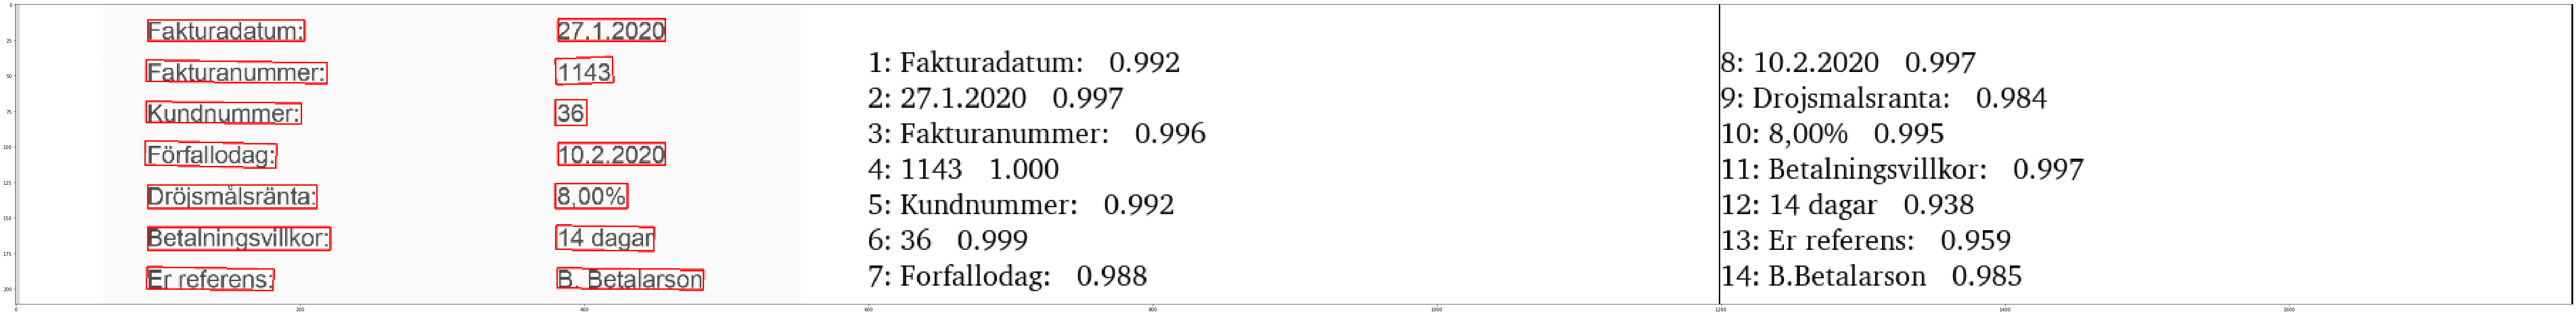

In [67]:
# Visualize our image and detections

# resizing display area
plt.figure(figsize=(100,105)) 

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path= font_path) 

# show the image using matplotlib
plt.imshow(annotated) 
plt.show()

In [68]:
def dataGenerator(data):
    list_with_keys = data[::2]
    list_with_values = data[1::2]
    for i in range(len(list_with_keys)):    
        yield list_with_keys[i], list_with_values[i]


In [69]:
data = dataGenerator(data = texts)
type(data)

generator

In [70]:
for key, value in data:
    print(key,value)

Fakturadatum: 27.1.2020
Fakturanummer: 1143
Kundnummer: 36
Forfallodag: 10.2.2020
Drojsmalsranta: 8,00%
Betalningsvillkor: 14 dagar
Er referens: B.Betalarson
